In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [2]:
WSCC 3 machine 9 bus power system simulation by solving DAE using Mass Matrix DAE. 

We consider the system was simulated 0 to 10 seconds and then a three-phase fault occured near bus 7 at the end of line 5-7 and cleared in five cycles (0.083s) by opening line 5-7. 

We have three DAE problem to solve( 0-10s,10-10.086s and 10.086-20s). 

We have 3  different Y matix for pre fault, fault on and post fault condition.

System data, equations were taken from BWang's paper

ErrorException: syntax: extra token "3" after end of expression

In [3]:
# Defining the variables, parameters, deifferential equations, algebraic equations

function Ps(du, u, p, t)
    del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3 = u
    Ws, H1, H2, H3,   D1, D2, D3,  P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3,    e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3, 
    a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26, a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42,
    a_43, a_44, a_45, a_46, a_51, a_52, a_53, a_54, a_55, a_56, a_61, a_62, a_63, a_64, a_65, a_66= p
    

    du[1] = Ws*(w1-1)
    du[2] = (P_m1-P_e1-D1*(w1*Ws-Ws))/(2*H1)
    du[3] = Ws*(w2-1)
    du[4] = (P_m2-P_e2-D2*(w2*Ws-Ws))/(2*H2)
    du[5] = Ws*(w3-1)
    du[6] = (P_m3-P_e3-D3*(w3*Ws-Ws))/(2*H3)
    du[7] = -P_e1+(-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))
    du[8] = -P_e2+(-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))
    du[9] = -P_e3+(-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))
    nothing
end

Ps (generic function with 1 method)

In [4]:
# Mass matrix 

M = [1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

9×9 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [5]:
# DAE function

f = ODEFunction(Ps, mass_matrix = M)

(::ODEFunction{true, SciMLBase.FullSpecialize, typeof(Ps), Matrix{Float64}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}) (generic function with 1 method)

In [6]:
# Pre fault DAE formulation for 0-10 seconds using the initial values from Data provided in BWang's paper
# P_e1,Pe_2 and P_e3 calculated as per BWang's paper using the same data

u10=[0.0626, 1,   1.0567, 1,   0.9449, 1,    1.43824549482149, 1.040964945989, 0.757527164510807] #del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp1=(0.0, 10)
p10=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, # a11-a26 of Y
    0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133, # a31-a46 of Y
    0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770) # a51-a56 of Y

prob1=ODEProblem(f, u10, tsp1, p10)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 9-element Vector{Float64}:
 0.0626
 1.0
 1.0567
 1.0
 0.9449
 1.0
 1.43824549482149
 1.040964945989
 0.757527164510807

In [7]:
# prob1 = ODEProblem(f, [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807  ], (0.0, 10), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813, 1.0566, 1.0502, 1.0170, 0, 0, 0, 0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, 0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133, 0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770))

In [8]:
# Pre fault DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)

sol1 = solve(prob1, Rodas5(), reltol = 1e-4, abstol = 1e-4);

In [9]:
# Extracting pre fault solution for 6 variables plotting

y1 = sol1[1, :];
y2 = sol1[2, :];
y3 = sol1[3, :];
y4 = sol1[4, :];
y5 = sol1[5, :];
y6 = sol1[6, :];

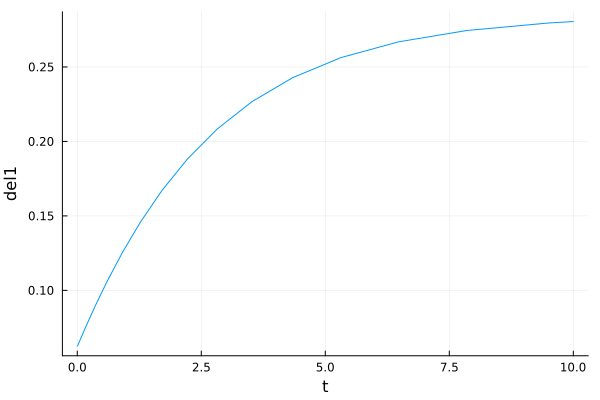

In [10]:
# Pre fault solution plot of del1

p1 = plot(sol1.t, y1, xlabel = "t", ylabel = "del1", legend = false)

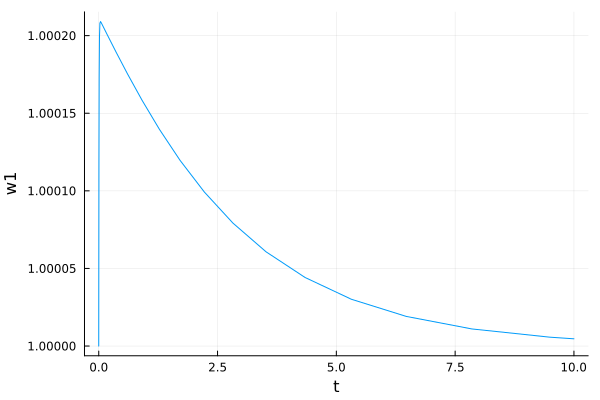

In [11]:
# Pre fault solution plot of w1

p2 = plot(sol1.t, y2, xlabel = "t", ylabel = "w1", legend = false)

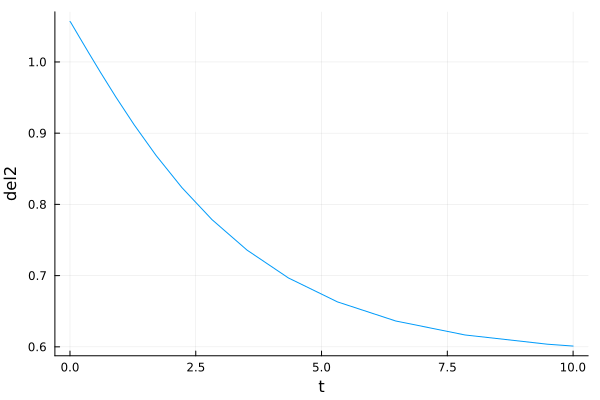

In [12]:
# Pre fault solution plot of del2

p3 = plot(sol1.t, y3, xlabel = "t", ylabel = "del2", legend = false)

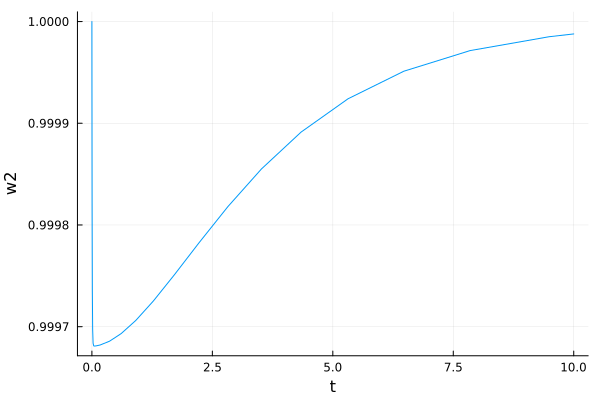

In [13]:
# Pre fault solution plot of w2


p4 = plot(sol1.t, y4, xlabel = "t", ylabel = "w2", legend = false)

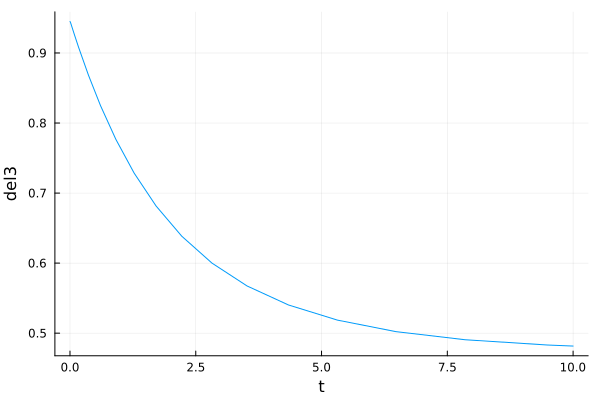

In [14]:
# Pre fault solution plot of del3

p5 = plot(sol1.t, y5, xlabel = "t", ylabel = "del3", legend = false)

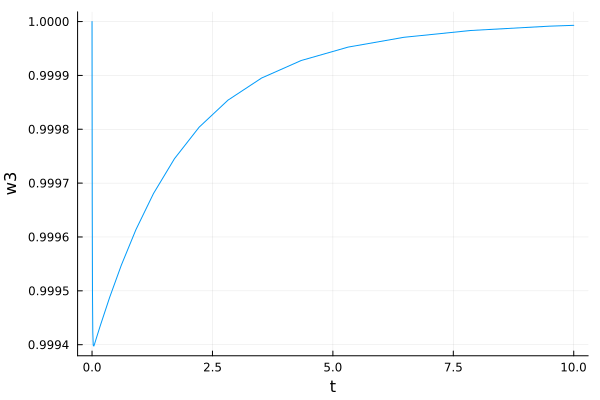

In [15]:
# Pre fault solution plot of w3

p6 = plot(sol1.t, y6, xlabel = "t", ylabel = "w3", legend = false)

In [16]:
# Extracting end solution at 10s to feed as initial values for fault on calculation

q=length(sol1.u)
i2=sol1.u[q]

9-element Vector{Float64}:
 0.2804973072795233
 1.0000046737616586
 0.6010975528223498
 0.999987822900838
 0.4816056008516666
 0.9999929868959316
 0.674835588279386
 1.659318141505159
 0.8579411222206508

In [17]:
# Fault on DAE formulation for 10-10.083 seconds using the initial values from the end solution at 10s from pre fault solution
# P_e1,Pe_2 and P_e3 taken from the end solution at 10s from pre fault solution
# New Y matrix taken from BWang's Paper for fault on condition

u20=[i2[1], i2[2], i2[3], i2[4], i2[5], i2[6],   i2[7], i2[8], i2[9]] # del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp2=(10.0, 10.083)
p20=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    0.657, 3.816, 0, 0, 0.070, -0.631, -3.816, 0.657, 0, 0, 0.631, 0.070, # a11-a26 of Y
    0, 0, 0, 5.486, 0, 0, 0, 0, -5.486, 0, 0, 0,                          # a31-a46 of Y
    0.070, -0.631, 0, 0, 0.174, 2.796, 0.631, 0.070, 0, 0, -2.796, 0.174) # a51-a56 of Y

prob2=ODEProblem(f, u20, tsp2, p20)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (10.0, 10.083)
u0: 9-element Vector{Float64}:
 0.2804973072795233
 1.0000046737616586
 0.6010975528223498
 0.999987822900838
 0.4816056008516666
 0.9999929868959316
 0.674835588279386
 1.659318141505159
 0.8579411222206508

In [18]:
# prob2=ODEProblem(f, [i2[1], i2[2], i2[3], i2[4], i2[5], i2[6],   i2[7], i2[8], i2[9]  ], (10.0, 10.083), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,     0.0608, 0.1198, 0.1813,    1.0566, 1.0502, 1.0170,     0, 0, 0,     0.657, 3.816, 0, 0, 0.070, -0.631,      -3.816, 0.657, 0, 0, 0.631, 0.070,      0, 0, 0, 5.486, 0, 0,      0, 0, -5.486, 0, 0, 0,       0.070, -0.631, 0, 0, 0.174, 2.796,       0.631, 0.070, 0, 0, -2.796, 0.174))

In [19]:
# Fault on DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)

sol2 = solve(prob2, Rodas5(), reltol = 1e-4, abstol = 1e-4) ;

In [20]:
# Extracting fault on solution for 6 variables plotting

y7 = sol2[1, :];
y8 = sol2[2, :];
y9 = sol2[3, :];
y10 = sol2[4, :];
y11 = sol2[5, :];
y12 = sol2[6, :];

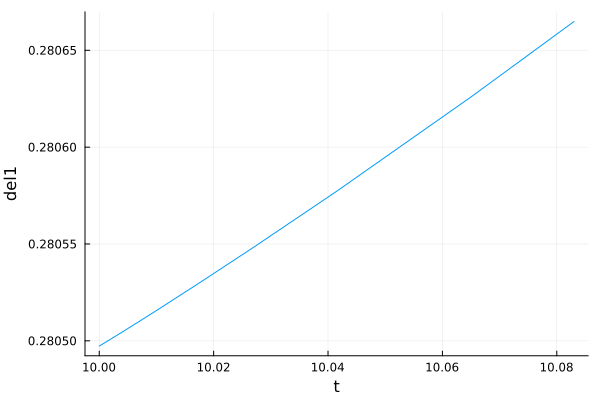

In [22]:
# Fault on solution plot of del1

p7 = plot(sol2.t, y7, xlabel = "t", ylabel = "del1", legend = false)

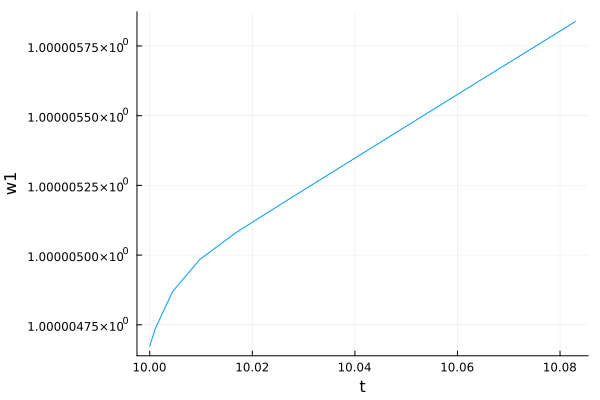

In [23]:
# Fault on solution plot of w1

p8 = plot(sol2.t, y8, xlabel = "t", ylabel = "w1", legend = false)

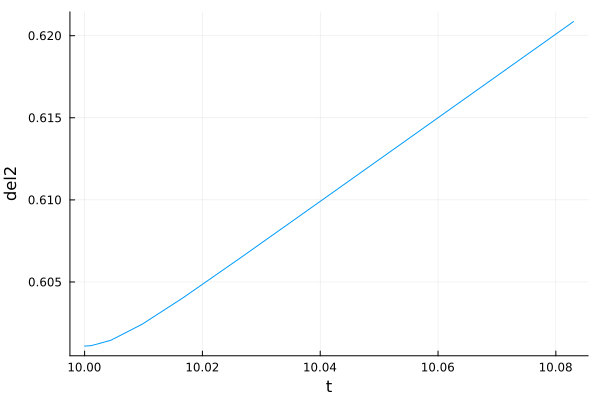

In [24]:
# Fault on solution plot of del2

p9 = plot(sol2.t, y9, xlabel = "t", ylabel = "del2", legend = false)

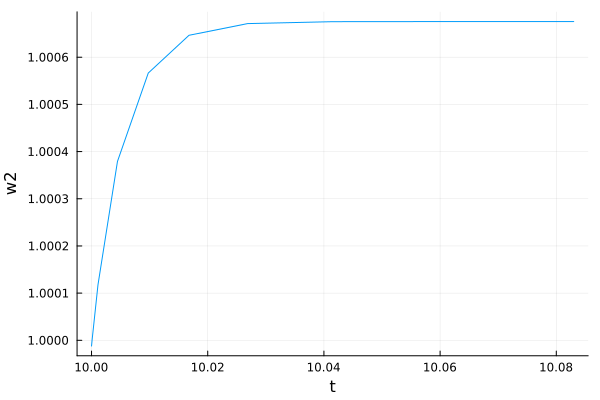

In [25]:
# Fault on solution plot of w2

p10 = plot(sol2.t, y10, xlabel = "t", ylabel = "w2", legend = false)

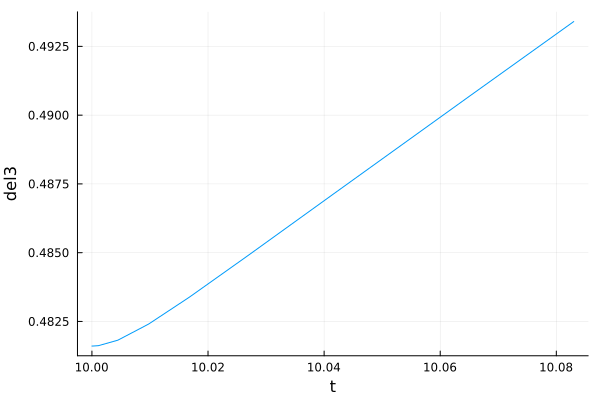

In [26]:
# Fault on solution plot of del3

p11 = plot(sol2.t, y11, xlabel = "t", ylabel = "del3", legend = false)

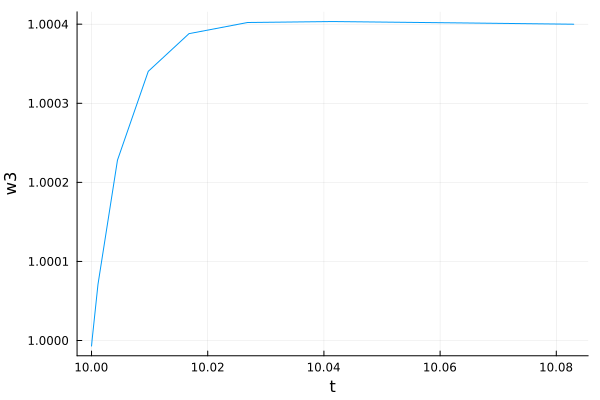

In [27]:
# Fault on solution plot of w3

p12 = plot(sol2.t, y12, xlabel = "t", ylabel = "w3", legend = false)

In [28]:
# Extracting end solution at 10.083s to feed as initial values for post fault calculation

q1=length(sol2.u)
i3=sol2.u[q1]

9-element Vector{Float64}:
  0.2806648467545078
  1.0000058375326975
  0.620861102090323
  1.0006755795168523
  0.49340256896722073
  1.000399966910345
  0.6638398189150766
 -2.4612843441719844e-16
  0.39665090574736156

In [29]:
# post fault DAE formulation for 10.083-20 seconds using the initial values from the end solution at 10.086s from fault on solution
# P_e1,Pe_2 and P_e3 taken from the end solution at 10.086s from fault on solution
# New Y matrix taken from BWang's Paper for post fault condition


u30=[i3[1], i3[2], i3[3], i3[4], i3[5], i3[6],   i3[7], i3[8], i3[9]] # del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp3=(10.083, 20.0)
p30=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    1.181, 2.229, 0.138, -0.726, 0.191, -1.079, -2.229, 1.181, 0.726, 0.138, 1.079, 0.191,   # a11-a26 of Y
    0.138, -0.726, 0.389, 1.953, 0.199, -1.229, 0.726, 0.138, -1.953, 0.389, 1.229, 0.199,   # a31-a46 of Y
    0.191, -1.079, 0.199, -1.299, 0.273, 2.342, 1.079, 0.191, 0.174, 0.199, -2.342, 0.273)   # a51-a56 of Y

prob3=ODEProblem(f, u30, tsp3, p30)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (10.083, 20.0)
u0: 9-element Vector{Float64}:
  0.2806648467545078
  1.0000058375326975
  0.620861102090323
  1.0006755795168523
  0.49340256896722073
  1.000399966910345
  0.6638398189150766
 -2.4612843441719844e-16
  0.39665090574736156

In [30]:
# prob3=ODEProblem(f, [i3[1], i3[2], i3[3], i3[4], i3[5], i3[6],   i3[7], i3[8], i3[9]  ], (10.083, 20), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,     0.0608, 0.1198, 0.1813,    1.0566, 1.0502, 1.0170,     0, 0, 0,     1.181, 2.229, 0.138, -0.726, 0.191, -1.079,      -2.229, 1.181, 0.726, 0.138, 1.079, 0.191,      0.138, -0.726, 0.389, 1.953, 0.199, -1.229,       0.726, 0.138, -1.953, 0.389, 1.229, 0.199,       0.191, -1.079, 0.199, -1.299, 0.273, 2.342,       1.079, 0.191, 0.174, 0.199, -2.342, 0.273))


In [31]:
# Post fault DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)

sol3 = solve(prob3, Rodas5(), reltol = 1e-4, abstol = 1e-4) ;

In [32]:
# Extracting post fault solution for 6 variables plotting

y13 = sol3[1, :];
y14 = sol3[2, :];
y15 = sol3[3, :];
y16 = sol3[4, :];
y17 = sol3[5, :];
y18 = sol3[6, :];


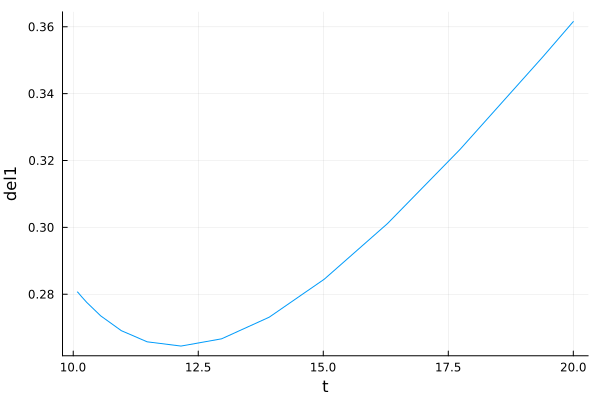

In [33]:
# post fault solution plot of del1

p13 = plot(sol3.t, y13, xlabel = "t", ylabel = "del1", legend = false)

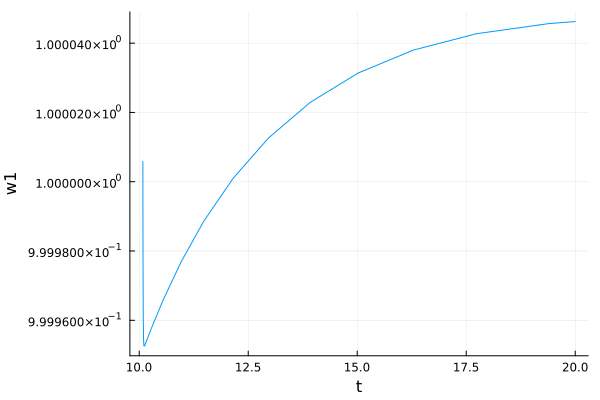

In [34]:
# post fault solution plot of w1

p14 = plot(sol3.t, y14, xlabel = "t", ylabel = "w1", legend = false)

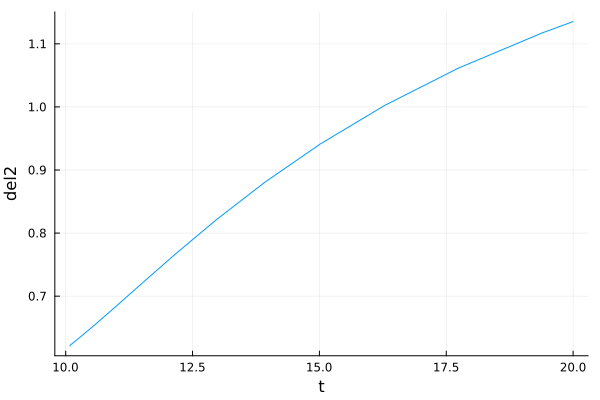

In [35]:
# post fault solution plot of del2

p15 = plot(sol3.t, y15, xlabel = "t", ylabel = "del2", legend = false)

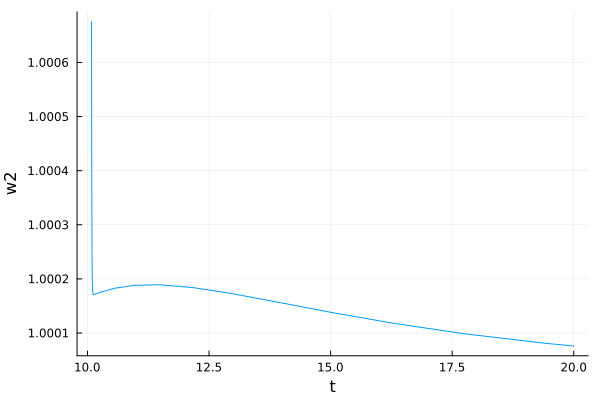

In [36]:
# post fault solution plot of w2

p16 = plot(sol3.t, y16, xlabel = "t", ylabel = "w2", legend = false)

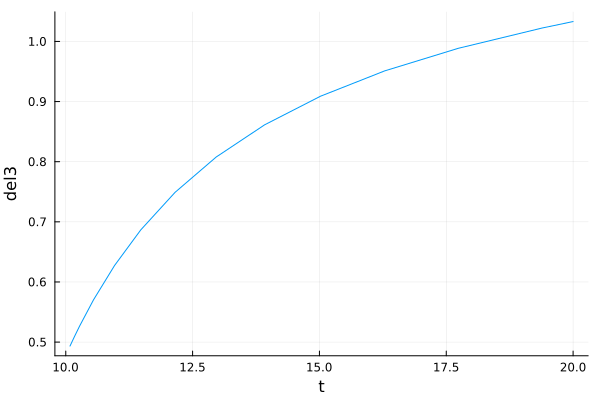

In [37]:
# post fault solution plot of del3

p17 = plot(sol3.t, y17, xlabel = "t", ylabel = "del3", legend = false)

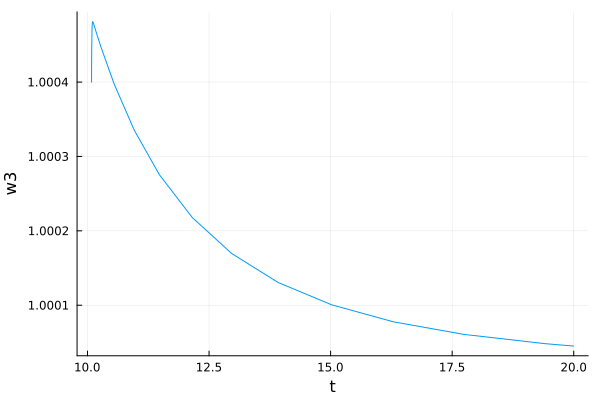

In [38]:
# post fault solution plot of w3

p18 =plot(sol3.t, y18, xlabel = "t", ylabel = "w3", legend = false)

In [39]:
# Combining pre fault, fault on and post fault solution to plot all three soultion together for 0-20 seconds

combined_t = vcat(sol1.t, sol2.t, sol3.t )  
combined_y1 = vcat(y1, y7, y13)
combined_y2 = vcat(y2, y8, y14)
combined_y3 = vcat(y3, y9, y15)
combined_y4 = vcat(y4, y10, y16)
combined_y5 = vcat(y5, y11, y17)
combined_y6 = vcat(y6, y12, y18);

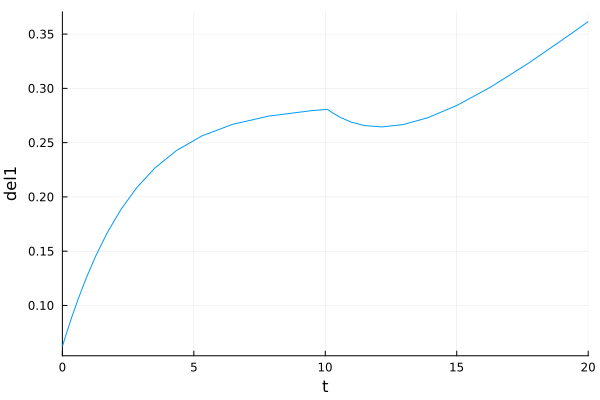

In [40]:
# Final plot of del1 from 0 to 20 seconds under pre fault, fault on and post fault condition

fdel1=plot(combined_t, combined_y1, xlabel = "t", ylabel = "del1", legend = false, xlims = (0, 20))

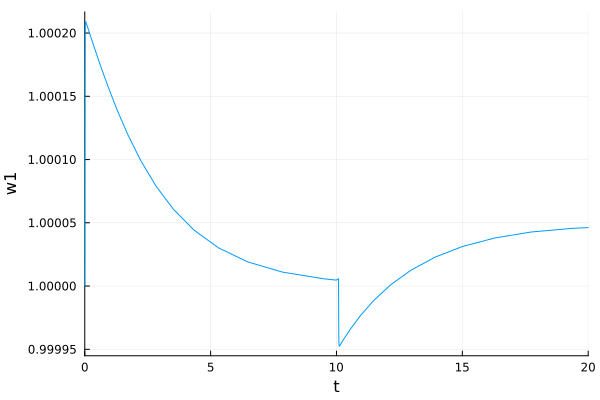

In [41]:
# Final plot of w1 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw1=plot(combined_t, combined_y2, xlabel = "t", ylabel = "w1", legend = false, xlims = (0, 20))

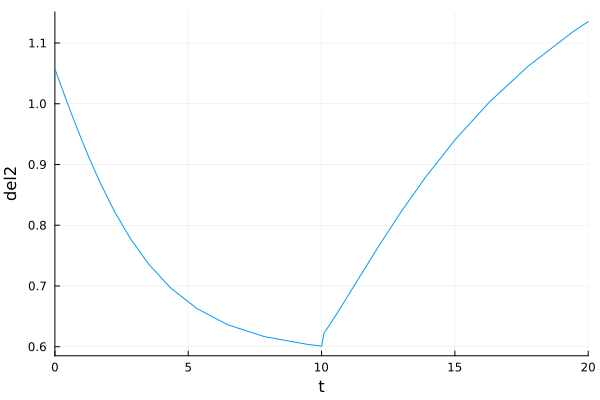

In [42]:
# Final plot of del2 from 0 to 15 seconds under pre fault, fault on and post fault condition

fdel2=plot(combined_t, combined_y3, xlabel = "t", ylabel = "del2", legend = false, xlims = (0, 20))

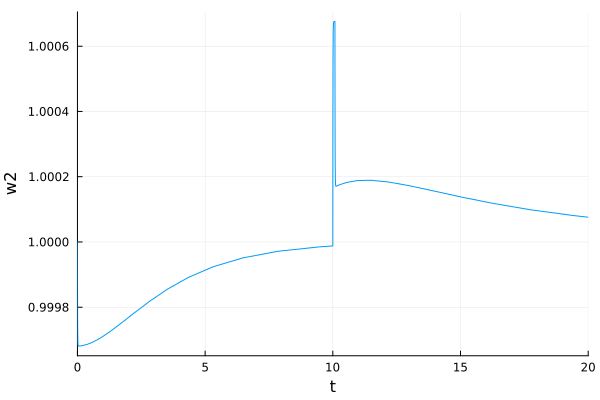

In [43]:
# Final plot of w2 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw2=plot(combined_t, combined_y4, xlabel = "t", ylabel = "w2", legend = false, xlims = (0, 20))

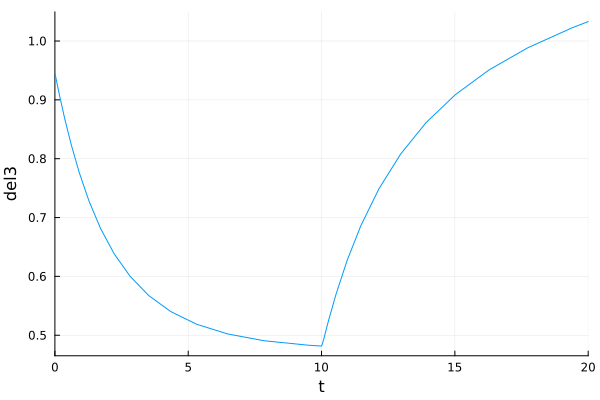

In [44]:
# Final plot of del3 from 0 to 15 seconds under pre fault, fault on and post fault condition

fdel3=plot(combined_t, combined_y5, xlabel = "t", ylabel = "del3", legend = false, xlims = (0, 20))

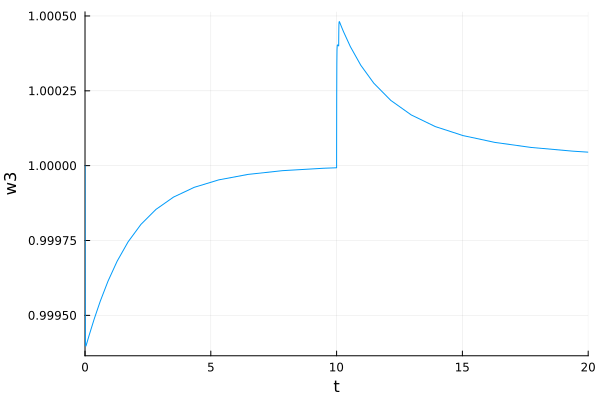

In [45]:
# Final plot of w3 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw3=plot(combined_t, combined_y6, xlabel = "t", ylabel = "w3", legend = false, xlims = (0, 20))

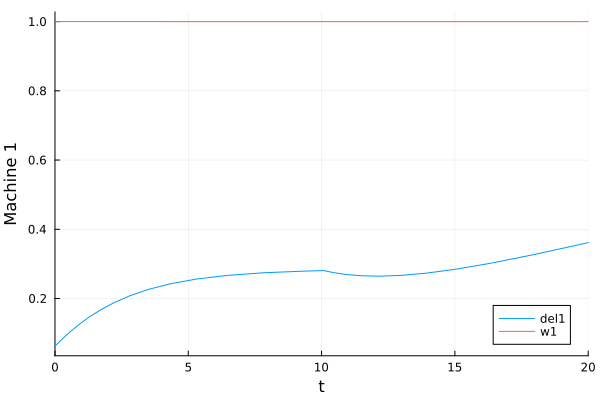

In [46]:
# Machine 1 variables (del1, w1) plot

plot(combined_t, combined_y1, xlabel = "t", ylabel = "Machine 1", label="del1", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y2,  label="w1", xlims=(0, 20), legend=true)



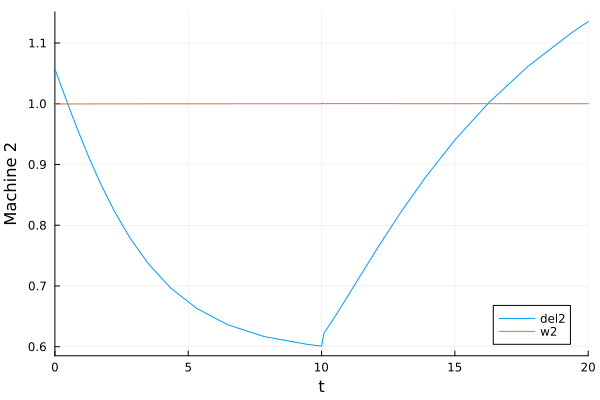

In [47]:
# Machine 2 variables (del2, w2) plot

plot(combined_t, combined_y3, xlabel = "t", ylabel = "Machine 2", label="del2", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y4,  label="w2", xlims=(0, 20), legend=true)

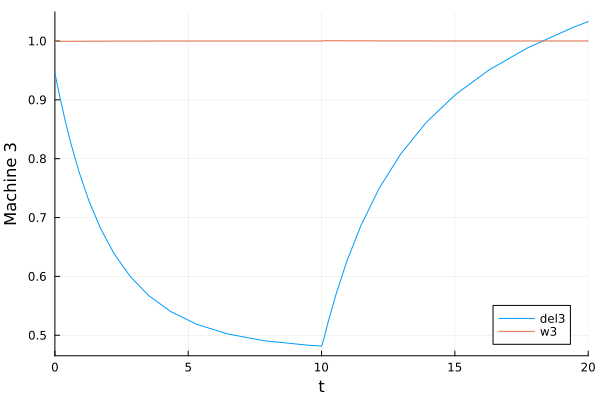

In [48]:
# Machine 2 variables (del3, w3) plot

plot(combined_t, combined_y5, xlabel = "t", ylabel = "Machine 3", label="del3", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y6,  label="w3", xlims=(0, 20), legend=true)